<a href="https://colab.research.google.com/github/pamelasschlegel/Predicting-Heart-Disease-with-Machine-Learning/blob/main/Predicting_Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Cardiovascular Disease with a Machine Learning Model


---

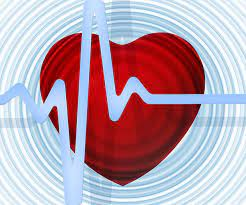


According to the American Heart Association, heart disease remains the number one cause of death in the United States according to 2020 data.The estimated direct and indirect cost of heart disease in 2018 to 2019 (average annual) was $239.9 billion in the United States.

source: American Heart Association 2023 Statistics [link to source](https://professional.heart.org/en/science-news/heart-disease-and-stroke-statistics-2023-update)

> My interest in the health field and personal experience with loved ones having cardiovascular disease were the driving forces in choosing this topic for a machine learning model. I chose a dataset that had both clinical continuous values (age, height, weight, systolic and diastolic blood pressure measurements) and behavioral categorical boolean values (smoking, alcohol consumption, activity level). The dataset also included ordinal encoded categorical fields for cholesterol level and glucose level. I feel including both behavior and medical vitals will give a more complete picture of health for the machine learning model.  

 I envision a physicians office using this model to input patient information during intake for a visit. Hopefully, the model would return an accurate predication as to whether a patient has heart disease so that additional cardiological testing/evaluation could be done to catch new heart disease earlier. The model’s prediction could also be used to reduce unnecessary cardiovascular testing for patients which would support patient and insurance savings.






# Risk Factors for Cardiovascular Heart Disease Dataset - Kaggle [[source]](https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas)
This dataset contains detailed information on the risk factors for cardiovascular disease. It includes information on age, gender, height, weight, blood pressure values, cholesterol levels, glucose levels, smoking habits and alcohol consumption of over 70 thousand individuals. Additionally it outlines if the person is active or not and if he or she has any cardiovascular diseases.

Data Dictionary - Dataset Features

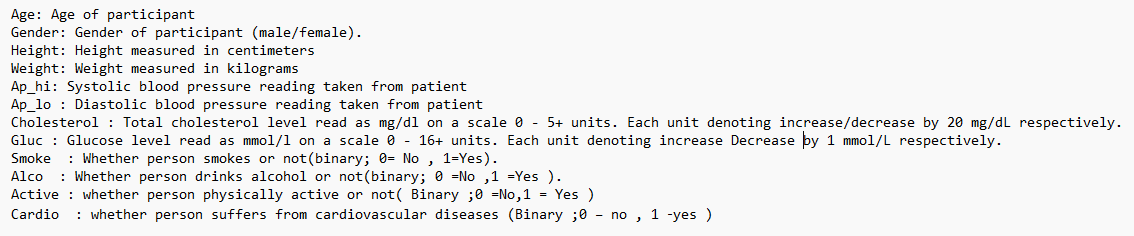

Importing Libraries for use in analysis, model building, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visuals
import seaborn as sns # for data visuals
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # for finding validation set accuracy
from sklearn.linear_model import LogisticRegression # for trying a logistic regression model
from sklearn.tree import DecisionTreeClassifier # for trying a decision tree model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier # for trying advanced decsion tree models
from sklearn.model_selection import GridSearchCV # for tuning hyperparameters
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score # for defining performance of a classification model

Reading the data into a pandas dataframe and viewing the top five rows of data.

In [ ]:
heart_data = pd.read_csv('/content/heart data.csv') # loading data into pandas dataframe
heart_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Some things noted about the dataset upon viewing first five rows of data. 
1. The age column seems to have a unit of days.This would put our range in the age field between 29-65 years old. This seems reasonable and in line with the dataset description given on Kaggle.
2. The gender column is encoded with 1 for male and 2 for female.
3. Height and weight columns are in cm and kg respectively.
4. The behavioral categories (smoke, alcohol, active) have already been encoded with 0 for false and 1 for true for the behavior.
5. The cholesterol and glucose columns have ordinal encoded data. Upon initial inspection, they look to be enoded with values of  1,2 or 3. I will verify this using value_counts() in a later step.
6. The index and id columns contain unique values and therefore are not needed and will be dropped.
7. The columns contain a wide range of values so I may want to normalize my data before training my machine learning model. Decision trees typically don't need normalized data, but I will investigate the accuracy both with and without normalization.
8. I have a target feature named cardio which is a boolean encoded data type.





Investigating shape, columns and datatypes in our dataset.

In [ ]:
heart_data.shape # finding number of observations and features in dataframe

(70000, 14)

In [ ]:
heart_data.columns # viewing columns

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
heart_data.duplicated().sum() # checking for duplicate rows

0

In [ ]:
heart_data.info() # looking at data types and checking number of nulls in each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


We know that we have 70000 rows of data from running .shape on our dataframe. We can see from .info() that we have no nulls in this dataframe. Nice!

In [ ]:
heart_data.describe() # getting a sense of our data and looking for data inconsistencies

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


###Data Wrangling


*  Dropping columns we do not need which were identified earlier 
as the 'index' and 'id' columns.
*   Converting the 'age' column to years. This will help to bring the values closer to other values in the dataset and is just plain easier to work with as it is the units we usually work in with age.
*   Converting height and weight columns to US units of feet and pounds respectively for ease of interpreting and they are the units of measures used in the US for these features.
*   Changing the encoding in the gender field to 0 for male, 1 for female for consistency within the dataset.










In [ ]:
heart_data = heart_data.drop(['index','id'], axis=1) # dropping irrelevant columns

In [ ]:
heart_data['age'] = round((heart_data['age']/365),2) # converting age in days to years and rounding to two decimal places

In [ ]:
heart_data['height'] = round((heart_data['height']*0.0328084),2) # converting units of measure to US units (ft and lbs)
heart_data['weight'] = round((heart_data['weight']*2.20462),2)

In [ ]:
heart_data.loc[heart_data['gender'] == 1, 'gender'] = 0 # changing encoding of 1 and 2 for gender to 0 and 1 
heart_data.loc[heart_data['gender'] == 2, 'gender'] = 1

In [ ]:
heart_data.head() # verifying changes 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.39,1,5.51,136.69,110,80,1,1,0,0,1,0
1,55.42,0,5.12,187.39,140,90,3,1,0,0,1,1
2,51.66,0,5.41,141.10,130,70,3,1,0,0,0,1
3,48.28,1,5.54,180.78,150,100,1,1,0,0,1,1
4,47.87,0,5.12,123.46,100,60,1,1,0,0,0,0


In [ ]:
heart_data.describe() # using describe again to begin to deal with outliers

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339349,0.349571,5.391931,163.595188,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759573,0.476838,0.269297,31.737318,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.580000,0.000000,1.800000,22.050000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.390000,0.000000,5.220000,143.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980000,0.000000,5.410000,158.730000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430000,1.000000,5.580000,180.780000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.970000,1.000000,8.200000,440.920000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Observations from using describe():
There seems to be some outliers in our data in the height, weight, ap_hi and ap_lo fields.
1. Height and weight seem to have outliers on the low end of the range. Height has a minimum value of 1.8 feet and weight has a minimum value of 22 lbs. These are almost certainly outliers as our dataset age range is between 29.5 and 65 years old.  On the high end of the range (max) for data in these fields, height has a max value of 8.2 while although physically possible, is very uncommon. The max value for weight is 440.9 lbs, which although not common is also possible. Without having access to someone to verify these values, we will choose to to keep the max values for these fields as they are both physically possible values for height and weight.  We will use logic based on reasonable physically possible values the low end values for both height and weight. 
2.   The ap_hi and ap_lo fields also seem to have some outliers. The minimum values in both these fields are negative. We know this is not possible. In addition, the max values for both these fields are also not possible (ap_hi of 16,020 and an ap_lo of 1100). We will need to investigate further to look at the distribution of values in these fields as well to determine how many outliers we have in these fields. I will need to gather some domain knowledge on possible values for these readings to deal with these outliers.

We will choose to remove the instances with outliers from our dataset. We are considering these values outliers as opposed to anomalies because the values being removed from the dataset are physically not possible. Removing these instances will still leave us with a large dataset for our model.




Let's look at our data distribution for blood pressure features in graphic form.

(array([6.9988e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([ -150.,  1467.,  3084.,  4701.,  6318.,  7935.,  9552., 11169.,
        12786., 14403., 16020.]),
 <BarContainer object of 10 artists>)

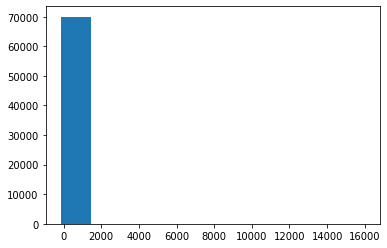

In [ ]:
plt.hist(heart_data['ap_hi']) # viewing data disribution for ap_hi feature

(array([6.9766e+04, 2.1000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 1.1000e+01, 4.0000e+00, 4.0000e+00]),
 array([  -70.,  1037.,  2144.,  3251.,  4358.,  5465.,  6572.,  7679.,
         8786.,  9893., 11000.]),
 <BarContainer object of 10 artists>)

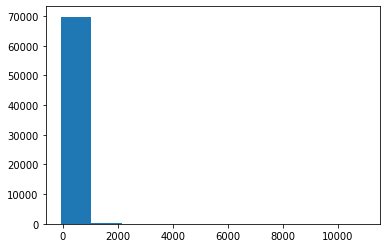

In [ ]:
plt.hist(heart_data['ap_lo']) # viewing data distribution for ap_lo feature

These graphics visualize the extreme values that we saw with our summary statistics. Because the range of data points is so large, our data distribution is off. We know these values are not valid values, so we need to remove them and then check our distributions again.

The American College of Cardiology & American Heart Association's guidelines for blood pressure in adults. These values are a starting point for acceptable ranges for the data in the ap_hi and ap_lo fields. Further investigation into humanly possible systolic/diastolic blood pressure readings is needed to define appropriate ranges to clean up the dataset. This is an area where having access to someone with domain expertise (a cardiologist) would be helpful. We will use what is available to us on the internet and make an informed decision on appropriate ranges for values in both the ap_hi and ap_lo fields.
The following graphics are from Healthline:
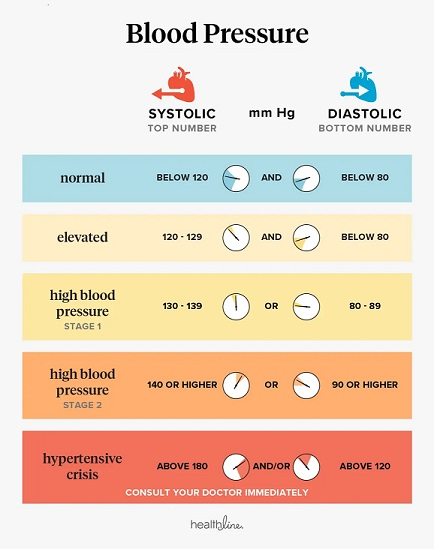


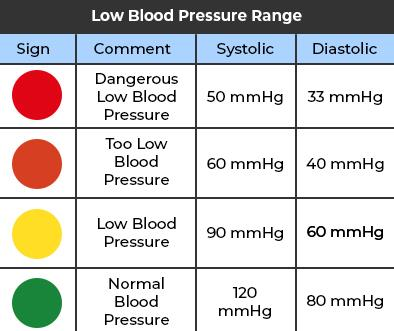

Using the information from the American Heart Association, we will remove instances with data that cannot be possible.

In [ ]:
heart_data = heart_data.loc[heart_data['height'] > 3.5] # removing instances with outliers by setting the lower boundary for height at 3.5 feet accounting for dwarfism
heart_data = heart_data.loc[heart_data['weight'] > 70] # removing instances with outliers by setting lower boundary for weight at 70 lbs

In [ ]:
heart_data = heart_data.loc[(heart_data['ap_hi']>50) & (heart_data['ap_hi']<250)] # removing instances with values outside of the range of viable values
heart_data = heart_data.loc[(heart_data['ap_lo']>30) & (heart_data['ap_lo']< 180)]

In [ ]:
heart_data.describe() # viewing the cleansed data set

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000
mean,53.327585,0.348752,5.393387,163.412494,126.614143,81.373008,1.364802,1.226046,0.088017,0.053619,0.803390,0.494900
std,6.761413,0.476579,0.261081,31.517309,16.756426,9.621964,0.679048,0.572025,0.283322,0.225267,0.397438,0.499978
min,29.580000,0.000000,3.540000,70.550000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.380000,0.000000,5.220000,143.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980000,0.000000,5.410000,158.730000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.420000,1.000000,5.580000,180.780000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.970000,1.000000,8.200000,440.920000,240.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(array([1.7000e+01, 1.1320e+03, 1.1380e+04, 3.7434e+04, 9.9450e+03,
        7.2150e+03, 1.3290e+03, 2.2200e+02, 4.3000e+01, 8.0000e+00]),
 array([ 60.,  78.,  96., 114., 132., 150., 168., 186., 204., 222., 240.]),
 <BarContainer object of 10 artists>)

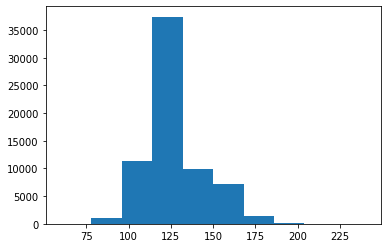

In [ ]:
plt.hist(heart_data['ap_hi']) # checking distribution of data after removing outliers

(array([7.8000e+01, 2.8560e+03, 1.0712e+04, 4.9957e+04, 4.3710e+03,
        4.5100e+02, 2.4800e+02, 3.1000e+01, 8.0000e+00, 1.3000e+01]),
 array([ 40.,  53.,  66.,  79.,  92., 105., 118., 131., 144., 157., 170.]),
 <BarContainer object of 10 artists>)

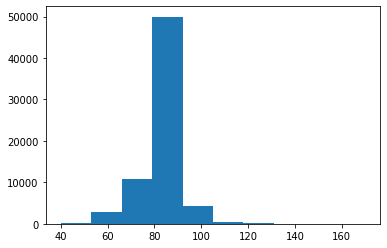

In [ ]:
plt.hist(heart_data['ap_lo']) # checking distribution of data after removing outliers

(array([4.9000e+01, 3.8000e+01, 2.4120e+03, 3.1278e+04, 3.2274e+04,
        2.6400e+03, 3.3000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.54 , 4.006, 4.472, 4.938, 5.404, 5.87 , 6.336, 6.802, 7.268,
        7.734, 8.2  ]),
 <BarContainer object of 10 artists>)

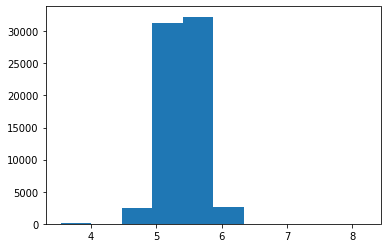

In [ ]:
plt.hist(heart_data['height'])

(array([7.9400e+02, 1.9707e+04, 3.1856e+04, 1.2659e+04, 2.9520e+03,
        5.9100e+02, 1.0300e+02, 4.4000e+01, 1.7000e+01, 2.0000e+00]),
 array([ 70.55 , 107.587, 144.624, 181.661, 218.698, 255.735, 292.772,
        329.809, 366.846, 403.883, 440.92 ]),
 <BarContainer object of 10 artists>)

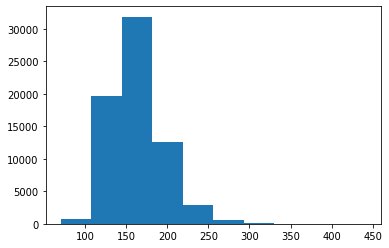

In [ ]:
plt.hist(heart_data['weight'])

With the outlier data removed, we now have better looking distributions. 

Let's use value_counts to check the distribution in my target feature. Since we have a classification problem, it is desirable for our target feature labels to be evenly distributed. This will help our classification model learn to distinguish between classes.

In [ ]:
heart_data['cardio'].value_counts()

0    34713
1    34012
Name: cardio, dtype: int64

Good news! My target is nicely distributed which will be effective for training a model.

In [ ]:
heart_data['cholesterol'].value_counts() # determining number of categories for cholesterol

1    51536
2     9307
3     7882
Name: cholesterol, dtype: int64

In [ ]:
heart_data['gluc'].value_counts() # determining number of categories for glucose

1    58422
3     5232
2     5071
Name: gluc, dtype: int64

###Modeling

First lets look at correlation between our features to ensure we don't have features with high redundancy.

In [ ]:
corr_matrix = heart_data.corr() # Finding correlation between features
corr_matrix["cardio"].sort_values(ascending=False)

cardio         1.000000
ap_hi          0.425056
ap_lo          0.336108
age            0.239527
cholesterol    0.221510
weight         0.179891
gluc           0.090039
gender         0.007281
alco          -0.008231
height        -0.012089
smoke         -0.016297
active        -0.037266
Name: cardio, dtype: float64

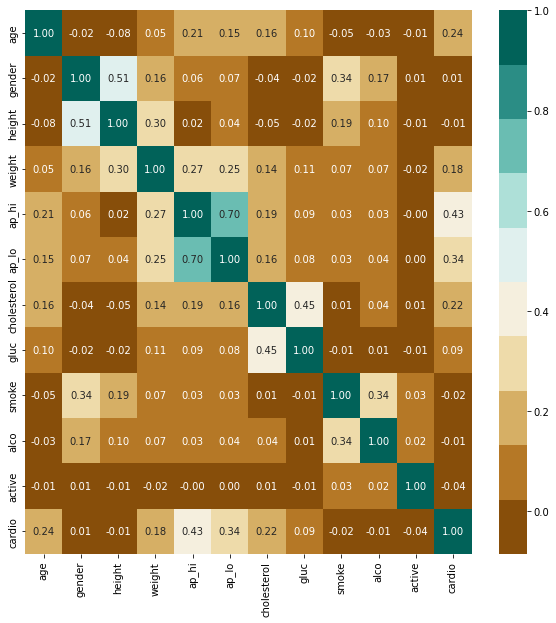

In [ ]:
# Plot heatmap to visually show which features (if any) are correlated
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
plt.show()

The heatmap shows that none of our dataset features are highly correlated. This indicates that we don't have redundancy in the dataset which is usually beneficial for model training. As such, I will keep all the features for initial machine learning modeling.

We are now ready to split our data into our feature matrix and our target data. Our target is the 'cardio' field. This field indicates positive (1) or negative (0) for heart disease for each instance.

In [ ]:
X = heart_data.drop(['cardio'], axis = 1) # Dropping identified features and defining feature matrix
y = heart_data[['cardio']] # target feature 

In [ ]:
X.columns #Verifying that columns were dropped in the feature matrix

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

Our dataset has features that are of different scales ('weight' and 'alcohol' as an example). As such, we will normalize our data to transform our features to be on a similar scale. This improves the performance and training stability of the model.

In [ ]:
Scaler = MinMaxScaler() # normalizing with the MinMaxScaler
X_scaled = Scaler.fit_transform(X) # fitting and transforming our feature data with the scaler

As mentioned in my intital EDA, I investigated whether my data needed to be normalized for use in my models. My iteration for model choice did return a message suggesting that I normalize my data when I attempted to train the models with the non normalized data. Therefore, for a better result, I will normalize my data before training the model(s).

We are now ready to split our data into training and testing sets.  We will use cross_val scores for the validation set, so I do not need a split for a separate validation set.

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state = 42) 

Now that the data is split between training and testing, let's take a look at our target values distribution to ensure they are well distributed. This will help our training model learn.

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

cardio
0         27851
1         27129
dtype: int64
cardio
1         6883
0         6862
dtype: int64


The distribution looks good. Now, on to training a model. The target is categorical so we will need a classification model. Logistic Regression is a good simple model which should be investigated. We will also want to look at DecisionTreeClassifier and more advanced Decision Tree Classifiers, such as RandomForestClassifier, AdaBoost, and GradientBoost. In order to look at several models in an efficient way, we will use a for loop to iterate through different classification models to find which one gives the best accuracy. We will also calculate a cross val score for each model. Comparing these values will give us insight into whether our model may be overfitting the data. Ideally the training set and cross-val scores will be similar.

In [ ]:
# create a list of machine learning models to iterate thru
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(random_state=42),AdaBoostClassifier(random_state=42),GradientBoostingClassifier(random_state=42)]
for model in models: # iterate thru each model
  model.fit(X_train,y_train.values.ravel()) # train model on training data
  accuracy = model.score(X_train,y_train.values.ravel()) # find accuracy of model training set
  model_cv_score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5) # calculate cross-val scores for model
  print(f'The', model, 'has an accuracy of ', round(accuracy*100,4),'%')
  print(f'The', model, 'has a cross-val score of ', round(model_cv_score.mean()*100,4),'%')



The LogisticRegression() has an accuracy of  72.8338 %
The LogisticRegression() has a cross-val score of  72.8228 %
The DecisionTreeClassifier() has an accuracy of  99.9454 %
The DecisionTreeClassifier() has a cross-val score of  63.6868 %
The RandomForestClassifier(random_state=42) has an accuracy of  99.9436 %
The RandomForestClassifier(random_state=42) has a cross-val score of  71.586 %
The AdaBoostClassifier(random_state=42) has an accuracy of  73.0029 %
The AdaBoostClassifier(random_state=42) has a cross-val score of  72.9447 %
The GradientBoostingClassifier(random_state=42) has an accuracy of  73.8905 %
The GradientBoostingClassifier(random_state=42) has a cross-val score of  73.614 %


Insights from model accuracy scores:


*   DecisionTreeClassifier and RandomForestClassifier seem to be overfitting the data. We know this because our training set accuracy as great as it is, can not be reproduced with cross validation or the testing data set. Although the RandomForestClassifier is overfitting, the cross-val and test set accuracy are closer to the training set accuracy than the DecisionTreeClassifier. Perhaps tuning the RandomForestClassifier hyperparameters will improve the overfitting.
*   GradientBoostingClassifier and LogisticRegression give very reproduceable results.GradientBoostingClassifier has slightly higher accuracy so we will attempt to tune the hyperparameters using GridSearchCV to see if we can increase the accuracy. 



GridSearchCV execution time can be long. We need to balance run time with potential model improvement. In an effort to make the execution time efficient, we will investigate tuning the generally more important hyperparameter for Decision Tree Classifiers. These are commonly accepted as n_estimators, max_depth and learning_rate. We will keep the default values in the list of values to try for each of the selected hyperparameter so we can see if other values are superior to using the default values for these hyperparameters.

In [ ]:
param_grid = { # setting the parameter grid
    "n_estimators": [25,100,300],
    "max_depth": [3,8,12],
    "learning_rate": [0.01,0.5,1]

}
gb_class = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_class, param_grid, cv=5)
grid_search.fit(X_train, y_train.values.ravel()) # fitting grid search to our training data set
print('Best Parameters',grid_search.best_params_)
print('Best Score', grid_search.best_score_)

Best Parameters {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 25}
Best Score 0.7344670789377956


In [ ]:
model = GradientBoostingClassifier(random_state = 42, n_estimators = 25, learning_rate = 0.5, max_leaf_nodes=100,max_depth = 3) # model with recommended hyperparameters
model.fit(X_train,y_train.values.ravel()) # train tuned model on training data
accuracy = model.score(X_train,y_train.values.ravel())
model_cv_score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
print(f'The', model, 'has an accuracy of ', accuracy)
print(f'The', model, 'has a cross-val score of ', model_cv_score.mean())


The GradientBoostingClassifier(learning_rate=0.5, max_leaf_nodes=100,
                           n_estimators=25, random_state=42) has an accuracy of  0.7383775918515824
The GradientBoostingClassifier(learning_rate=0.5, max_leaf_nodes=100,
                           n_estimators=25, random_state=42) has a cross-val score of  0.7344488905056383


Wow. That took some time to process. A few modifications needed to be made from my initial parameter grid. The code would not execute before timing out. So I needed to go back and reduce the number of hyperparameters and values. In the end, tuning the hyperparameters still produced a similar accuracy. 

We will run a quick investigation of tuning hyperparameters for the RandomForestClassifier model to see if we can correct the overfitting we saw with the default hyperparameters. We will iterate thru max_depth values. 

In [ ]:
max_depth_range = [10,12,13]
for md in max_depth_range:
  rf_classifier = RandomForestClassifier(n_estimators = 30, max_depth = md, random_state=42)
  rf_classifier.fit(X_train, y_train.values.ravel())
  rf_train_score = rf_classifier.score(X_train, y_train.values.ravel())
  rf_test_score = rf_classifier.score(X_test, y_test.values.ravel())
  rf_cross_val = cross_val_score(rf_classifier, X_train, y_train.values.ravel(), cv=5)
  print('The training set score is ',rf_train_score, 'for max_depth ', md)
  print('The cross-val score is' ,rf_cross_val.mean(), 'for max_depth', md)

The training set score is  0.7526736995271007 for max_depth  10
The cross-val score is 0.7345034558021099 for max_depth 10
The training set score is  0.7725354674427064 for max_depth  12
The cross-val score is 0.7340851218624955 for max_depth 12
The training set score is  0.7870316478719535 for max_depth  13
The cross-val score is 0.7333030192797381 for max_depth 13


The tuning of the hyperparameters did indeed reduce the overfitting for the RandomForestClassifier model. The accuracy is similar to the GradientBoostingClassifier accuracy, but GradientBoostingClassifier is slightly higher. As such, we will move forward with the tuned GradientBoostingClassifier model.

###Evaluation


We will now evaluate our model with our reserved test set.

In [ ]:
y_pred = model.predict(X_test) # using the trained model to make predictions on test data
accuracy = accuracy_score(y_test, y_pred) # finding test set accuracy
print('The test set accuracy score is ', round(accuracy*100,2), '%') # printing accuracy as percentage and rounded to two decimals
conf_mx = confusion_matrix(y_test,y_pred) # using confusion matrix for visual of errors
print('Confusion Matrix')
print(conf_mx) # printing the matrix
f1 = f1_score(y_test, y_pred) # finding the f1 score of test set
print('The f1 score is ', round(f1,2)) # printing f1 score
precision = precision_score(y_test,y_pred) # finding precision score of test set
print('The precision score is ', round(precision,2)) # printing precision score rounded to two decimals


The test set accuracy score is  73.03 %
Confusion Matrix
[[5314 1548]
 [2159 4724]]
The f1 score is  0.72
The precision score is  0.75


The test set accuracy score is 73.03%. This lines up nicely with our training set accuracy score of 73.84% and our cross-validation score of 73.44%

Let's also take a look at which features in our dataset our model found most important for predicting heart disease. 

In [ ]:
feature_importances = model.feature_importances_ # using feature_importances

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

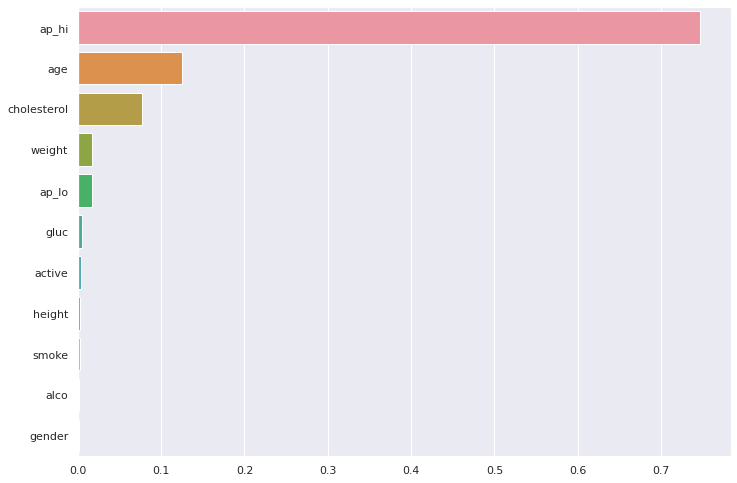

In [ ]:
# Setting up a bar chart with feature importances
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

This graphic shows that by in far, systolic blood pressure (ap_hi) is the most important feature in predicting heart disease. I find it interesting that diastolic blood pressure (ap_lo)is further down the order. I would be curious to know if we could get more detail on the behavioral features and use multi ordinal encoded values if any of those features would become more important in the machine learning model.

###Results

 

The prediction accuracy of the model, about 73%, was not impressive but is a good starting point. My F1 score, precision score and confusion matrix results all align with the accuracy score. More detailed data in the behavior features such as activity, smoking, alcohol use could give a better picture of overall health and may improve the model’s predictive ability. I would ask stakeholders for additional data to work with or if not available, recommend collecting additional data with amount of exercise per day, how many drinks per week, tobacco intake per day. 